<br>

# Calibrating lumefantrine monotherapy (both --lum and --AL) to give 87% effifcacy

## 1. Checking the average efficacy of lumefantrine monotherapy in both --lum and --AL modules

### a. --lum module

In [2]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolacors
from timeit import default_timer as timer
from matplotlib.ticker import MaxNLocator
import pickle
from tqdm import tqdm  # For progress bar
from multiprocessing import Pool, cpu_count

In [6]:
# Define the command
command_lum_monotherapy = [
    "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
    "--lum",
    "-n", "10000",
    "-o", "1" #Output the patient results only for final time point, hour = 671.0
]

# Initialize lists to store DataFrames and efficacies
dataframes = []
efficacies = []

# Run the command 5 times
for i in range(15):
    output_lum_monotherapy = subprocess.run(command_lum_monotherapy, capture_output=True, text=True, check=True)

    # Process the output
    lines_lum_monotherapy = output_lum_monotherapy.stdout.splitlines()
    df_lum_monotherapy = pd.DataFrame([line.split(',') for line in lines_lum_monotherapy], columns=["PID", "HOUR", "COMP2CONC_LUM", "PARASITEDENSITY"])
    
    # Clean the DataFrame
    df_lum_monotherapy = df_lum_monotherapy.iloc[1:].apply(pd.to_numeric, errors='coerce')
    
    # Store the DataFrame
    dataframes.append(df_lum_monotherapy)
    
    # Calculate the efficacy
    failed_treatment_count = df_lum_monotherapy[(df_lum_monotherapy['PARASITEDENSITY'] >= 10)].shape[0]
    total_patients = df_lum_monotherapy['PID'].nunique()
    efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0
    
    # Store the efficacy
    efficacies.append(efficacy)

    # Save the DataFrame as a CSV file
    df_lum_monotherapy.to_csv(f"pkpd_lum_monotherapy_efficacy_calibration_df_{i+1}.csv", index=False)

# Save all efficacies to a text file
with open("pkpd_lum_monotherapy_efficacy_calibration_01.txt", "w") as f:
    for i, efficacy in enumerate(efficacies):
        f.write(f"Run {i+1} - Efficacy: {efficacy:.2f}%\n")

# Print the efficacies
for i, efficacy in enumerate(efficacies):
    print(f"Run {i+1} - Efficacy: {efficacy:.2f}%")

Run 1 - Efficacy: 84.77%
Run 2 - Efficacy: 85.60%
Run 3 - Efficacy: 86.57%
Run 4 - Efficacy: 85.76%
Run 5 - Efficacy: 84.88%
Run 6 - Efficacy: 85.58%
Run 7 - Efficacy: 85.63%
Run 8 - Efficacy: 85.51%
Run 9 - Efficacy: 86.18%
Run 10 - Efficacy: 85.58%
Run 11 - Efficacy: 84.86%
Run 12 - Efficacy: 85.42%
Run 13 - Efficacy: 85.67%
Run 14 - Efficacy: 86.16%
Run 15 - Efficacy: 85.46%


In [35]:
# Define the command
command_AL_module_lum = [
    "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
    "--AL",
    "--pmax_art", "0",
    "-n", "10000",
    "-o", "1" #Output the patient results only for final time point, hour = 671.0
]

# Initialize lists to store DataFrames and efficacies
dataframes = []
efficacies = []

# Run the command 15 times
for i in range(15):
    output_AL_module_lum = subprocess.run(command_AL_module_lum, capture_output=True, text=True, check=True)

    # Process the output
    lines_AL_module_lum = output_AL_module_lum.stdout.splitlines()
    df_AL_module_lum = pd.DataFrame([line.split(',') for line in lines_AL_module_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
    # Clean the DataFrame
    df_AL_module_lum = df_AL_module_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')
    
    # Store the DataFrame
    dataframes.append(df_AL_module_lum)
    
    # Calculate the efficacy
    failed_treatment_count = df_AL_module_lum[(df_AL_module_lum['PARASITEDENSITY'] >= 10)].shape[0]
    total_patients = df_AL_module_lum['PID'].nunique()
    efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0
    
    # Store the efficacy
    efficacies.append(efficacy)

    # Save the DataFrame as a CSV file
    df_AL_module_lum.to_csv(f"pkpd_AL_module_lum_efficacy_calibration_df_{i+1}.csv", index=False)

# Save all efficacies to a text file
with open("pkpd_AL_module_lum_efficacy_calibration.txt", "w") as f:
    for i, efficacy in enumerate(efficacies):
        f.write(f"Run {i+1} - Efficacy: {efficacy:.2f}%\n")

# Print the efficacies
for i, efficacy in enumerate(efficacies):
    print(f"Run {i+1} - Efficacy: {efficacy:.2f}%")

Run 1 - Efficacy: 88.46%
Run 2 - Efficacy: 88.29%
Run 3 - Efficacy: 88.82%
Run 4 - Efficacy: 88.86%
Run 5 - Efficacy: 88.22%
Run 6 - Efficacy: 88.49%
Run 7 - Efficacy: 88.45%
Run 8 - Efficacy: 88.61%
Run 9 - Efficacy: 88.60%
Run 10 - Efficacy: 88.70%
Run 11 - Efficacy: 88.12%
Run 12 - Efficacy: 88.29%
Run 13 - Efficacy: 88.42%
Run 14 - Efficacy: 88.71%
Run 15 - Efficacy: 88.48%


In [7]:
# Define the command
command_AL_module_lum = [
    "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
    "--AL",
    "--pmax_art", "0",
    "--ec50_lum", "68",
    "-n", "10000",
    "-o", "1" #Output the patient results only for final time point, hour = 671.0
]

# Initialize lists to store DataFrames and efficacies
dataframes = []
efficacies = []

# Run the command 5 times
for i in range(5):
    output_AL_module_lum = subprocess.run(command_AL_module_lum, capture_output=True, text=True, check=True)

    # Process the output
    lines_AL_module_lum = output_AL_module_lum.stdout.splitlines()
    df_AL_module_lum = pd.DataFrame([line.split(',') for line in lines_AL_module_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
    # Clean the DataFrame
    df_AL_module_lum = df_AL_module_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')
    
    # Store the DataFrame
    dataframes.append(df_AL_module_lum)
    
    # Calculate the efficacy
    failed_treatment_count = df_AL_module_lum[(df_AL_module_lum['PARASITEDENSITY'] >= 10)].shape[0]
    total_patients = df_AL_module_lum['PID'].nunique()
    efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0
    
    # Store the efficacy
    efficacies.append(efficacy)

    # Save the DataFrame as a CSV file
    df_AL_module_lum.to_csv(f"pkpd_AL_module_lum_efficacy_calibration_test_03_df_{i+1}.csv", index=False)

# Save all efficacies to a text file
with open("pkpd_AL_module_efficacy_calibration_03.txt", "w") as f:
    for i, efficacy in enumerate(efficacies):
        f.write(f"Run {i+1} - Efficacy: {efficacy:.2f}%\n")

# Print the efficacies
for i, efficacy in enumerate(efficacies):
    print(f"Run {i+1} - Efficacy: {efficacy:.2f}%")

Run 1 - Efficacy: 87.63%
Run 2 - Efficacy: 86.91%
Run 3 - Efficacy: 86.65%
Run 4 - Efficacy: 86.96%
Run 5 - Efficacy: 86.66%


In [3]:
# Define the command
command_AL_module_lum = [
    "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
    "--AL",
    "--pmax_art", "0",
    "--ec50_lum", "66.87",
    "-n", "10000",
    "-o", "1" #Output the patient results only for final time point, hour = 671.0
]

# Initialize lists to store DataFrames and efficacies
dataframes = []
efficacies = []

# Run the command 10 times
for i in range(10):
    output_AL_module_lum = subprocess.run(command_AL_module_lum, capture_output=True, text=True, check=True)

    # Process the output
    lines_AL_module_lum = output_AL_module_lum.stdout.splitlines()
    df_AL_module_lum = pd.DataFrame([line.split(',') for line in lines_AL_module_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
    # Clean the DataFrame
    df_AL_module_lum = df_AL_module_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')
    
    # Store the DataFrame
    dataframes.append(df_AL_module_lum)
    
    # Calculate the efficacy
    failed_treatment_count = df_AL_module_lum[(df_AL_module_lum['PARASITEDENSITY'] >= 10)].shape[0]
    total_patients = df_AL_module_lum['PID'].nunique()
    efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0
    
    # Store the efficacy
    efficacies.append(efficacy)

    # Save the DataFrame as a CSV file
    df_AL_module_lum.to_csv(f"pkpd_AL_module_lum_efficacy_calibration_test_04_df_{i+1}.csv", index=False)

# Save all efficacies to a text file
with open("pkpd_AL_module_efficacy_calibration_04.txt", "w") as f:
    for i, efficacy in enumerate(efficacies):
        f.write(f"Run {i+1} - Efficacy: {efficacy:.2f}%\n")

# Print the efficacies
for i, efficacy in enumerate(efficacies):
    print(f"Run {i+1} - Efficacy: {efficacy:.2f}%")

Run 1 - Efficacy: 87.91%
Run 2 - Efficacy: 87.64%
Run 3 - Efficacy: 87.14%
Run 4 - Efficacy: 87.84%
Run 5 - Efficacy: 87.23%
Run 6 - Efficacy: 87.67%
Run 7 - Efficacy: 87.85%
Run 8 - Efficacy: 87.27%
Run 9 - Efficacy: 87.59%
Run 10 - Efficacy: 87.10%


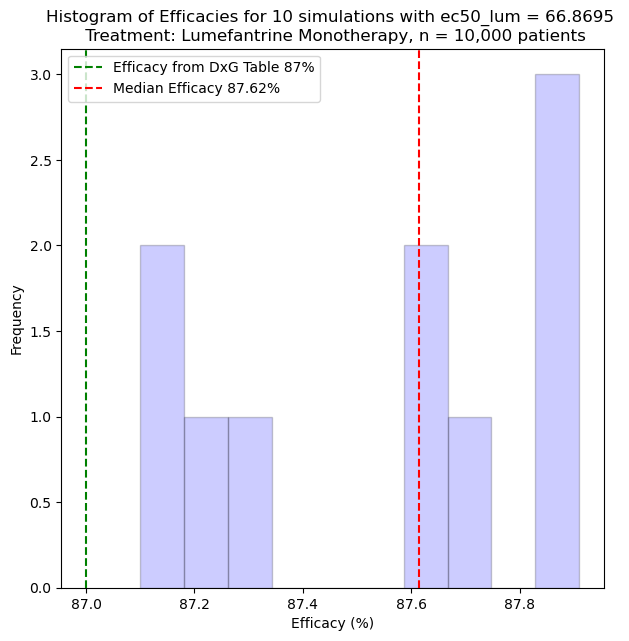

In [12]:
efficacies = [87.91,
 87.64,
 87.14,
 87.84,
 87.23,
 87.67,
 87.85,
 87.27,
 87.59,
 87.10]

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.hist(efficacies, color= 'blue',alpha = 0.2,edgecolor='black', bins=10)
plt.title('Histogram of Efficacies for 10 simulations with ec50_lum = 66.8695 \n Treatment: Lumefantrine Monotherapy, n = 10,000 patients')
plt.axvline(x=87, color='green', linestyle='--', label=f'Efficacy from DxG Table 87%')
plt.axvline(x=np.median(efficacies), color='red', linestyle='--', label=f'Median Efficacy {np.median(efficacies):.2f}%')
plt.xlabel('Efficacy (%)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("pkpd_AL_module_efficacy_calibration_04_histogram.png")
plt.show()

In [4]:
# Define the command
command_AL_module_lum = [
    "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
    "--AL",
    "--pmax_art", "0",
    "--ec50_lum", "66.8695",
    "-n", "10000",
    "-o", "1" #Output the patient results only for final time point, hour = 671.0
]

# Initialize lists to store DataFrames and efficacies
dataframes = []
efficacies = []

# Run the command 10 times
for i in range(10):
    output_AL_module_lum = subprocess.run(command_AL_module_lum, capture_output=True, text=True, check=True)

    # Process the output
    lines_AL_module_lum = output_AL_module_lum.stdout.splitlines()
    df_AL_module_lum = pd.DataFrame([line.split(',') for line in lines_AL_module_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
    # Clean the DataFrame
    df_AL_module_lum = df_AL_module_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')
    
    # Store the DataFrame
    dataframes.append(df_AL_module_lum)
    
    # Calculate the efficacy
    failed_treatment_count = df_AL_module_lum[(df_AL_module_lum['PARASITEDENSITY'] >= 10)].shape[0]
    total_patients = df_AL_module_lum['PID'].nunique()
    efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0
    
    # Store the efficacy
    efficacies.append(efficacy)

    # Save the DataFrame as a CSV file
    df_AL_module_lum.to_csv(f"pkpd_AL_module_lum_efficacy_calibration_test_05_df_{i+1}.csv", index=False)

# Save all efficacies to a text file
with open("pkpd_AL_module_efficacy_calibration_05.txt", "w") as f:
    for i, efficacy in enumerate(efficacies):
        f.write(f"Run {i+1} - Efficacy: {efficacy:.2f}%\n")

# Print the efficacies
for i, efficacy in enumerate(efficacies):
    print(f"Run {i+1} - Efficacy: {efficacy:.2f}%")

Run 1 - Efficacy: 87.49%
Run 2 - Efficacy: 87.55%
Run 3 - Efficacy: 87.61%
Run 4 - Efficacy: 87.38%
Run 5 - Efficacy: 86.97%
Run 6 - Efficacy: 87.64%
Run 7 - Efficacy: 87.11%
Run 8 - Efficacy: 87.58%
Run 9 - Efficacy: 87.68%
Run 10 - Efficacy: 86.99%


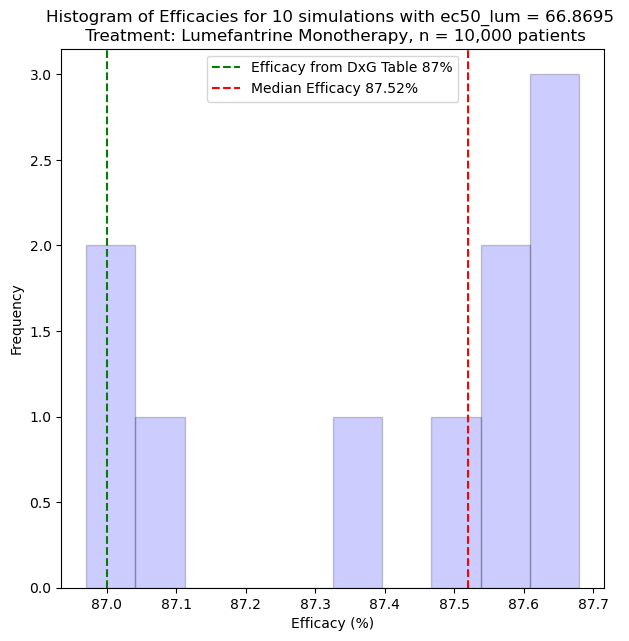

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.hist(efficacies, color= 'blue',alpha = 0.2,edgecolor='black', bins=10)
plt.title('Histogram of Efficacies for 10 simulations with ec50_lum = 66.8695 \n Treatment: Lumefantrine Monotherapy, n = 10,000 patients')
plt.axvline(x=87, color='green', linestyle='--', label=f'Efficacy from DxG Table 87%')
plt.axvline(x=np.median(efficacies), color='red', linestyle='--', label=f'Median Efficacy {np.median(efficacies):.2f}%')
plt.xlabel('Efficacy (%)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("pkpd_AL_module_efficacy_calibration_05_histogram.png")
plt.show()

In [13]:
# Define the command
command_AL_module_lum = [
    "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
    "--AL",
    "--pmax_art", "0",
    "--ec50_lum", "66.8695",
    "--pmax_lum", "0.90774",
    "-n", "10000",
    "-o", "1" #Output the patient results only for final time point, hour = 671.0
]

# Initialize lists to store DataFrames and efficacies
dataframes = []
efficacies = []

# Run the command 10 times
for i in range(10):
    output_AL_module_lum = subprocess.run(command_AL_module_lum, capture_output=True, text=True, check=True)

    # Process the output
    lines_AL_module_lum = output_AL_module_lum.stdout.splitlines()
    df_AL_module_lum = pd.DataFrame([line.split(',') for line in lines_AL_module_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
    # Clean the DataFrame
    df_AL_module_lum = df_AL_module_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')
    
    # Store the DataFrame
    dataframes.append(df_AL_module_lum)
    
    # Calculate the efficacy
    failed_treatment_count = df_AL_module_lum[(df_AL_module_lum['PARASITEDENSITY'] >= 10)].shape[0]
    total_patients = df_AL_module_lum['PID'].nunique()
    efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0
    
    # Store the efficacy
    efficacies.append(efficacy)

    # Save the DataFrame as a CSV file
    df_AL_module_lum.to_csv(f"pkpd_AL_module_lum_efficacy_calibration_test_06_df_{i+1}.csv", index=False)

# Save all efficacies to a text file
with open("pkpd_AL_module_efficacy_calibration_06.txt", "w") as f:
    for i, efficacy in enumerate(efficacies):
        f.write(f"Run {i+1} - Efficacy: {efficacy:.2f}%\n")

# Print the efficacies
for i, efficacy in enumerate(efficacies):
    print(f"Run {i+1} - Efficacy: {efficacy:.2f}%")

Run 1 - Efficacy: 85.55%
Run 2 - Efficacy: 84.88%
Run 3 - Efficacy: 84.94%
Run 4 - Efficacy: 85.59%
Run 5 - Efficacy: 85.17%
Run 6 - Efficacy: 85.75%
Run 7 - Efficacy: 85.07%
Run 8 - Efficacy: 84.87%
Run 9 - Efficacy: 85.40%
Run 10 - Efficacy: 85.52%


In [2]:
# Define the command
command_AL_module_lum = [
    "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
    "--AL",
    "--pmax_art", "0",
    "--ec50_lum", "66.8695",
    "--pmax_lum", "0.92694",
    "-n", "10000",
    "-o", "1" #Output the patient results only for final time point, hour = 671.0
]

# Initialize lists to store DataFrames and efficacies
dataframes = []
efficacies = []

# Run the command 10 times
for i in range(10):
    output_AL_module_lum = subprocess.run(command_AL_module_lum, capture_output=True, text=True, check=True)

    # Process the output
    lines_AL_module_lum = output_AL_module_lum.stdout.splitlines()
    df_AL_module_lum = pd.DataFrame([line.split(',') for line in lines_AL_module_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
    # Clean the DataFrame
    df_AL_module_lum = df_AL_module_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')
    
    # Store the DataFrame
    dataframes.append(df_AL_module_lum)
    
    # Calculate the efficacy
    failed_treatment_count = df_AL_module_lum[(df_AL_module_lum['PARASITEDENSITY'] >= 10)].shape[0]
    total_patients = df_AL_module_lum['PID'].nunique()
    efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0
    
    # Store the efficacy
    efficacies.append(efficacy)

    # Save the DataFrame as a CSV file
    df_AL_module_lum.to_csv(f"pkpd_AL_module_lum_efficacy_calibration_test_07_df_{i+1}.csv", index=False)

# Save all efficacies to a text file
with open("pkpd_AL_module_efficacy_calibration_07.txt", "w") as f:
    for i, efficacy in enumerate(efficacies):
        f.write(f"Run {i+1} - Efficacy: {efficacy:.2f}%\n")

# Print the efficacies
for i, efficacy in enumerate(efficacies):
    print(f"Run {i+1} - Efficacy: {efficacy:.2f}%")

Run 1 - Efficacy: 85.94%
Run 2 - Efficacy: 85.43%
Run 3 - Efficacy: 86.52%
Run 4 - Efficacy: 85.26%
Run 5 - Efficacy: 86.06%
Run 6 - Efficacy: 85.56%
Run 7 - Efficacy: 86.19%
Run 8 - Efficacy: 85.64%
Run 9 - Efficacy: 85.62%
Run 10 - Efficacy: 86.14%


In [3]:
# Define the command
command_AL_module_lum = [
    "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
    "--AL",
    "--ec50_lum", "66.8695",
    "--pmax_lum", "0.92694",
    "-n", "10000",
    "-o", "1" #Output the patient results only for final time point, hour = 671.0
]

# Initialize lists to store DataFrames and efficacies
dataframes = []
efficacies = []

# Run the command 10 times
for i in range(10):
    output_AL_module_lum = subprocess.run(command_AL_module_lum, capture_output=True, text=True, check=True)

    # Process the output
    lines_AL_module_lum = output_AL_module_lum.stdout.splitlines()
    df_AL_module_lum = pd.DataFrame([line.split(',') for line in lines_AL_module_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
    # Clean the DataFrame
    df_AL_module_lum = df_AL_module_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')
    
    # Store the DataFrame
    dataframes.append(df_AL_module_lum)
    
    # Calculate the efficacy
    failed_treatment_count = df_AL_module_lum[(df_AL_module_lum['PARASITEDENSITY'] >= 10)].shape[0]
    total_patients = df_AL_module_lum['PID'].nunique()
    efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0
    
    # Store the efficacy
    efficacies.append(efficacy)

    # Save the DataFrame as a CSV file
    df_AL_module_lum.to_csv(f"pkpd_AL_module_efficacy_calibration_test_01_df_{i+1}.csv", index=False)

# Save all efficacies to a text file
with open("pkpd_AL_module_efficacy_calibration_01.txt", "w") as f:
    for i, efficacy in enumerate(efficacies):
        f.write(f"Run {i+1} - Efficacy: {efficacy:.2f}%\n")

# Print the efficacies
for i, efficacy in enumerate(efficacies):
    print(f"Run {i+1} - Efficacy: {efficacy:.2f}%")

Run 1 - Efficacy: 97.47%
Run 2 - Efficacy: 97.51%
Run 3 - Efficacy: 97.64%
Run 4 - Efficacy: 97.54%
Run 5 - Efficacy: 97.55%
Run 6 - Efficacy: 97.46%
Run 7 - Efficacy: 97.69%
Run 8 - Efficacy: 97.68%
Run 9 - Efficacy: 97.56%
Run 10 - Efficacy: 97.47%


In [2]:
# Define the command
command_AL_module_lum = [
    "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
    "--AL",
    "-n", "10000",
    "-o", "1" #Output the patient results only for final time point, hour = 671.0
]

# Initialize lists to store DataFrames and efficacies
dataframes = []
efficacies = []

# Run the command 5 times
for i in range(5):
    output_AL_module_lum = subprocess.run(command_AL_module_lum, capture_output=True, text=True, check=True)

    # Process the output
    lines_AL_module_lum = output_AL_module_lum.stdout.splitlines()
    df_AL_module_lum = pd.DataFrame([line.split(',') for line in lines_AL_module_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
    # Clean the DataFrame
    df_AL_module_lum = df_AL_module_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')
    
    # Store the DataFrame
    dataframes.append(df_AL_module_lum)
    
    # Calculate the efficacy
    failed_treatment_count = df_AL_module_lum[(df_AL_module_lum['PARASITEDENSITY'] >= 10)].shape[0]
    total_patients = df_AL_module_lum['PID'].nunique()
    efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0
    
    # Store the efficacy
    efficacies.append(efficacy)

    # Save the DataFrame as a CSV file
    df_AL_module_lum.to_csv(f"pkpd_AL_module_efficacy_calibration_test_02_df_{i+1}.csv", index=False)

# Save all efficacies to a text file
with open("pkpd_AL_module_efficacy_calibration_02.txt", "w") as f:
    for i, efficacy in enumerate(efficacies):
        f.write(f"Run {i+1} - Efficacy: {efficacy:.2f}%\n")

# Print the efficacies
for i, efficacy in enumerate(efficacies):
    print(f"Run {i+1} - Efficacy: {efficacy:.2f}%")

Run 1 - Efficacy: 97.65%
Run 2 - Efficacy: 97.51%
Run 3 - Efficacy: 97.69%
Run 4 - Efficacy: 97.87%
Run 5 - Efficacy: 97.92%


In [3]:
# Define the command
command_AL_module_lum = [
    "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
    "--AL",
    "--ec50_lum", "66.8695",
    "-n", "10000",
    "-o", "1" #Output the patient results only for final time point, hour = 671.0
]

# Initialize lists to store DataFrames and efficacies
dataframes = []
efficacies = []

# Run the command 5 times
for i in range(5):
    output_AL_module_lum = subprocess.run(command_AL_module_lum, capture_output=True, text=True, check=True)

    # Process the output
    lines_AL_module_lum = output_AL_module_lum.stdout.splitlines()
    df_AL_module_lum = pd.DataFrame([line.split(',') for line in lines_AL_module_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
    # Clean the DataFrame
    df_AL_module_lum = df_AL_module_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')
    
    # Store the DataFrame
    dataframes.append(df_AL_module_lum)
    
    # Calculate the efficacy
    failed_treatment_count = df_AL_module_lum[(df_AL_module_lum['PARASITEDENSITY'] >= 10)].shape[0]
    total_patients = df_AL_module_lum['PID'].nunique()
    efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0
    
    # Store the efficacy
    efficacies.append(efficacy)

    # Save the DataFrame as a CSV file
    df_AL_module_lum.to_csv(f"pkpd_AL_module_efficacy_calibration_test_03_df_{i+1}.csv", index=False)

# Save all efficacies to a text file
with open("pkpd_AL_module_efficacy_calibration_03.txt", "w") as f:
    for i, efficacy in enumerate(efficacies):
        f.write(f"Run {i+1} - Efficacy: {efficacy:.2f}%\n")

# Print the efficacies
for i, efficacy in enumerate(efficacies):
    print(f"Run {i+1} - Efficacy: {efficacy:.2f}%")

Run 1 - Efficacy: 97.65%
Run 2 - Efficacy: 97.63%
Run 3 - Efficacy: 97.34%
Run 4 - Efficacy: 97.70%
Run 5 - Efficacy: 97.53%


In [9]:
# Define the command

command_AL_module_lum = [
    "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
    "--AL",
    "-n", "500",
    "-o", "1" #Output the patient results only for final time point, hour = 671.0
]

output_AL_module_lum = subprocess.run(command_AL_module_lum, capture_output=True, text=True, check=True)

    # Process the output
lines_AL_module_lum = output_AL_module_lum.stdout.splitlines()
df_AL_module_lum = pd.DataFrame([line.split(',') for line in lines_AL_module_lum], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
    # Clean the DataFrame
df_AL_module_lum = df_AL_module_lum.iloc[1:].apply(pd.to_numeric, errors='coerce')
    
    
# Calculate the efficacy
failed_treatment_count = df_AL_module_lum[(df_AL_module_lum['PARASITEDENSITY'] >= 10)].shape[0]
total_patients = df_AL_module_lum['PID'].nunique()
efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

print("The efficacy is: ", efficacy)
    

The efficacy is:  97.4
